In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV



In [2]:
df=pd.read_csv("student_depression_dataset.csv")

In [3]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


Understanding Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Cleaning

In [5]:
df.isna().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [6]:
df.duplicated().sum()

0

Feature engineering

In [7]:
df['Profession'].value_counts()

Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
'Content Writer'                2
Chef                            2
Doctor                          2
Pharmacist                      2
'Civil Engineer'                1
'UX/UI Designer'                1
'Educational Consultant'        1
Manager                         1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64

Since it is student data set and there are only fewer working people, can remove the data and columns job stisfaction and work pressure

City and id also has no effect on target so remove them also

In [8]:
df = df[df['Profession'] == "Student"]

In [9]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

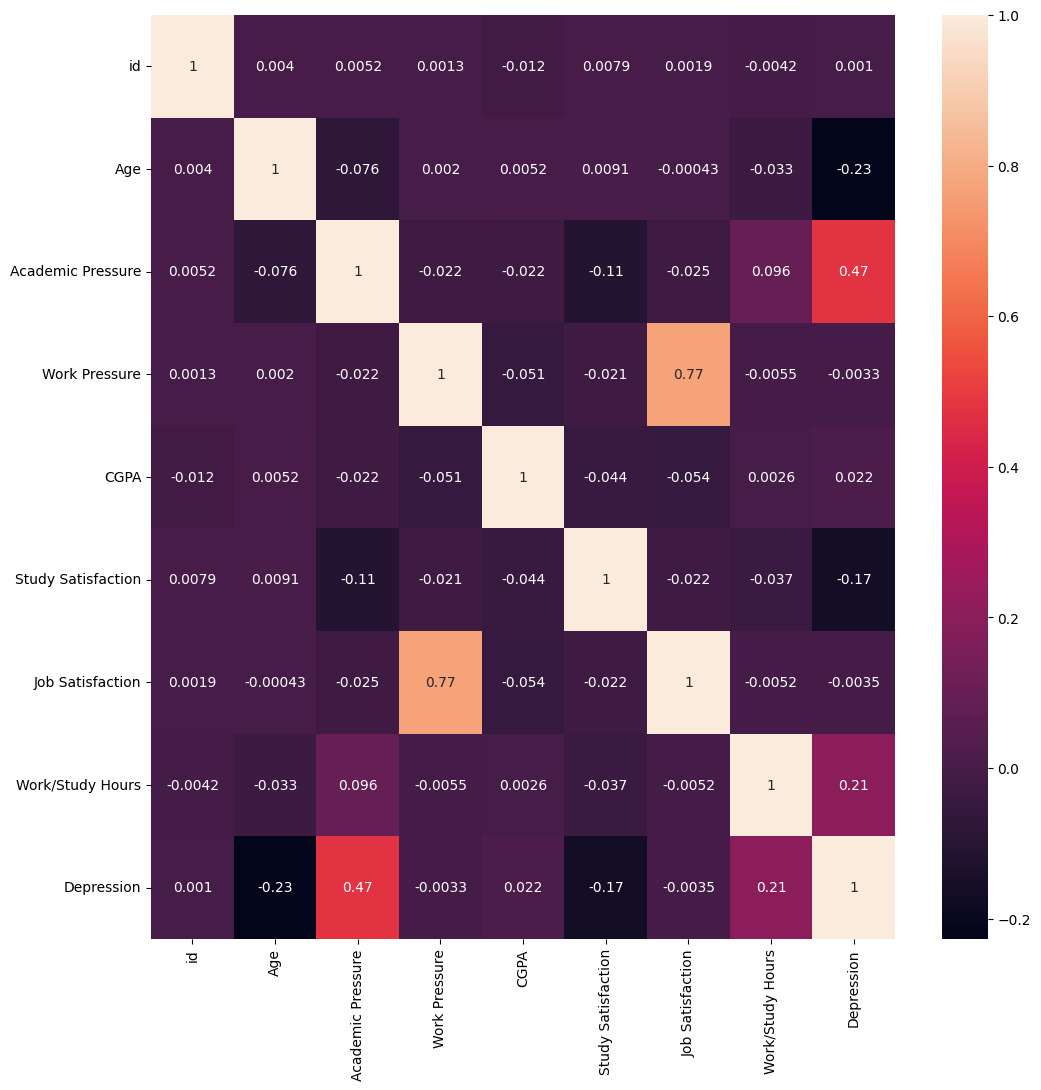

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [11]:
df.drop(columns=["id","City","Job Satisfaction","Profession","Work Pressure"],inplace=True)

C:\Users\Aspire\AppData\Local\Temp\ipykernel_10436\2305721463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["id","City","Job Satisfaction","Profession","Work Pressure"],inplace=True)


In [12]:
for i in df:
    if df[i].dtypes=="object":
        print(df[i].unique())

['Male' 'Female']
["'5-6 hours'" "'Less than 5 hours'" "'7-8 hours'" "'More than 8 hours'"
 'Others']
['Healthy' 'Moderate' 'Unhealthy' 'Others']
['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' "'Class 12'" 'B.Ed' 'LLB' 'BE'
 'M.Ed' 'MSc' 'BHM' 'M.Pharm' 'MCA' 'MA' 'B.Com' 'MD' 'MBA' 'MBBS' 'M.Com'
 'B.Arch' 'LLM' 'B.Tech' 'BBA' 'ME' 'MHM' 'Others']
['Yes' 'No']
['1.0' '2.0' '5.0' '3.0' '4.0' '?']
['No' 'Yes']


In [13]:
df.nunique()

Gender                                     2
Age                                       34
Academic Pressure                          6
CGPA                                     332
Study Satisfaction                         6
Sleep Duration                             5
Dietary Habits                             4
Degree                                    28
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           6
Family History of Mental Illness           2
Depression                                 2
dtype: int64

In [14]:
df['Degree'].value_counts()

Degree
'Class 12'    6080
B.Ed          1864
B.Com         1506
B.Arch        1477
BCA           1432
MSc           1186
B.Tech        1152
MCA           1042
M.Tech        1022
BHM            922
BSc            885
M.Ed           821
B.Pharm        809
M.Com          733
MBBS           695
BBA            695
LLB            671
BE             612
BA             599
M.Pharm        581
MD             569
MBA            562
MA             542
PhD            521
LLM            481
MHM            191
ME             185
Others          35
Name: count, dtype: int64

In [15]:
df['Degree']=df['Degree'].str.strip("'")

C:\Users\Aspire\AppData\Local\Temp\ipykernel_10436\3719847287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Degree']=df['Degree'].str.strip("'")


since the column degree has 28 unique values we can group then according to their fields 

In [16]:
def categorize_degree(degree):
    if degree in ['Class 12']:
        return 'Higher Secondary'
    elif degree in ['B.Tech', 'BE', 'BCA', 'MCA', 'M.Tech', 'ME', 'MSc', 'PhD','BSc']:
        return 'Science & Technology'
    elif degree in ['MBBS', 'MD', 'B.Pharm', 'M.Pharm']:
        return 'Medical & Health Sciences'
    elif degree in ['B.Com', 'M.Com', 'BBA', 'MBA']:
        return 'Commerce & Management'
    elif degree in ['BA', 'MA']:
        return 'Arts & Humanities'
    elif degree in ['LLB', 'LLM', 'B.Ed', 'M.Ed']:
        return 'Law & Education'
    elif degree in ['BHM', 'MHM', 'B.Arch']:
        return 'Hospitality & Architecture'
    else:
        return 'Other'
df['Category'] = df['Degree'].apply(categorize_degree)



C:\Users\Aspire\AppData\Local\Temp\ipykernel_10436\1913328297.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = df['Degree'].apply(categorize_degree)


In [17]:
df['Category'].value_counts()

Category
Science & Technology          8037
Higher Secondary              6080
Law & Education               3837
Commerce & Management         3496
Medical & Health Sciences     2654
Hospitality & Architecture    2590
Arts & Humanities             1141
Other                           35
Name: count, dtype: int64

In [18]:
df=df.drop(columns=['Degree'])

In [19]:
df.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'Category'],
      dtype='object')

In [20]:
df = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 12, 7, 8, 9, 10, 11]]

In [21]:
df.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Category',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [22]:
df.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Category',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [23]:
df['Category'].dtype

dtype('O')

In [24]:
df['Sleep Duration'].value_counts()

Sleep Duration
'Less than 5 hours'    8303
'7-8 hours'            7337
'5-6 hours'            6177
'More than 8 hours'    6035
Others                   18
Name: count, dtype: int64

In [25]:
df['Sleep Duration']=df['Sleep Duration'].str.strip("'")

In [26]:
df[df['Sleep Duration']=='Others']['Depression'].value_counts()

Depression
0    9
1    9
Name: count, dtype: int64

In [27]:
df['Financial Stress'].value_counts()

Financial Stress
5.0    6704
4.0    5770
3.0    5219
1.0    5116
2.0    5058
?         3
Name: count, dtype: int64

In [28]:
df['Financial Stress'].dtype

dtype('O')

In [29]:
df = df[df['Financial Stress'] != '?']


In [30]:
df["Financial Stress"]=df["Financial Stress"].astype(float)

Outlier Detection

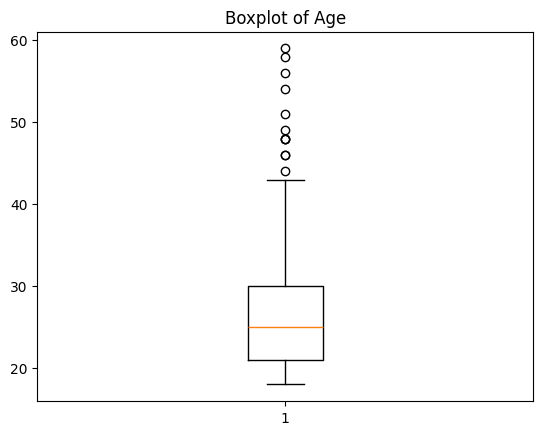

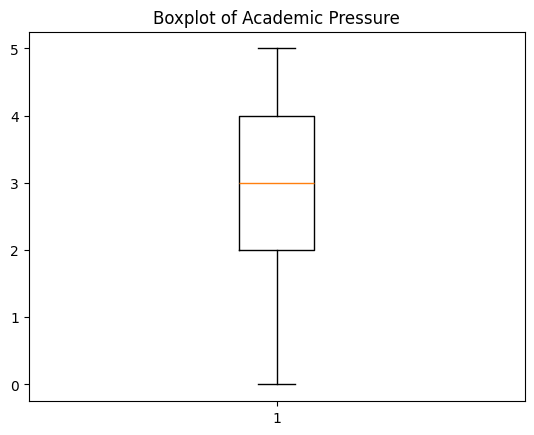

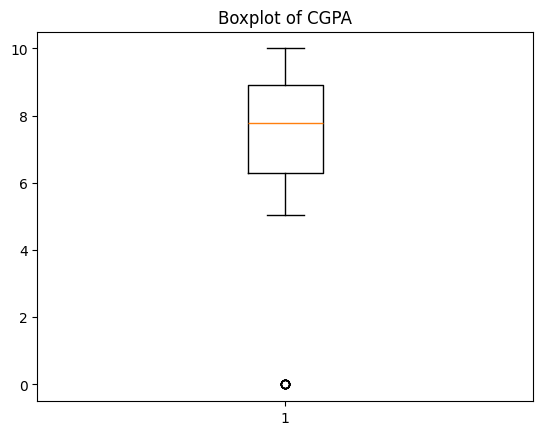

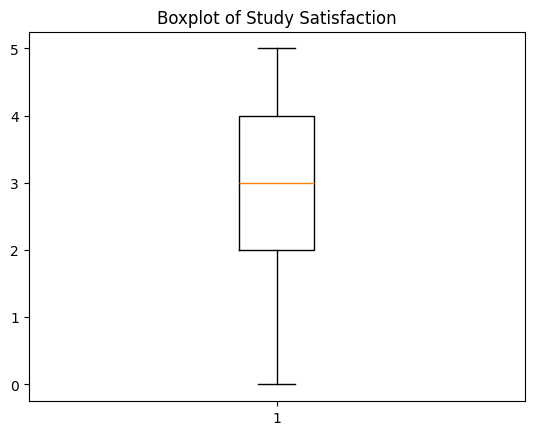

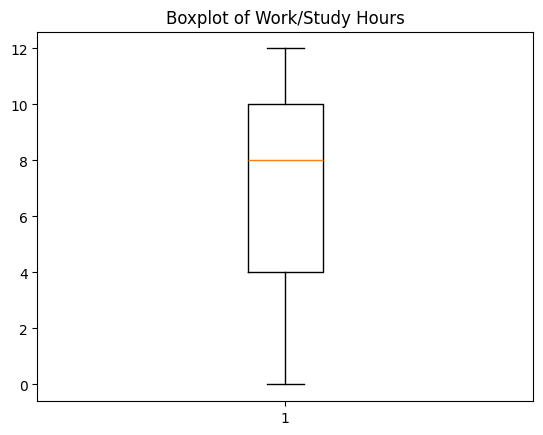

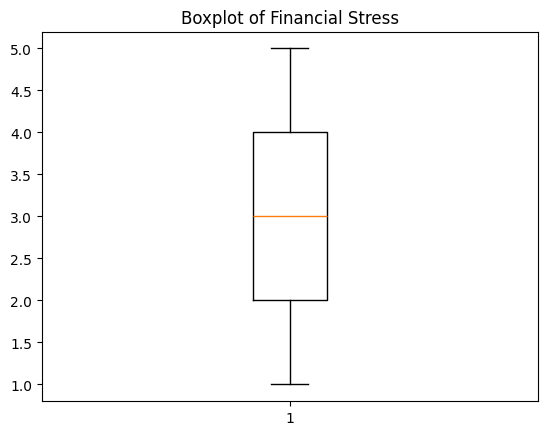

In [31]:
for i in df:
    if df[i].dtypes=='float':
        plt.boxplot(df[i])
        plt.title(f"Boxplot of {i}")
        plt.show()

In [32]:
df[df['CGPA']<2]['Depression'].value_counts()

Depression
0    5
1    4
Name: count, dtype: int64

In [33]:
df = df[df['CGPA'] != 0]

Encoding

In [34]:
for i in df:
    if df[i].nunique()==2:
        print(df[i].value_counts())

Gender
Male      15522
Female    12336
Name: count, dtype: int64
Have you ever had suicidal thoughts ?
Yes    17625
No     10233
Name: count, dtype: int64
Family History of Mental Illness
No     14377
Yes    13481
Name: count, dtype: int64
Depression
1    16303
0    11555
Name: count, dtype: int64


Label Encoding

In [35]:
label1=LabelEncoder()
df['Gender']=label1.fit_transform(df['Gender'])

In [36]:
label2=LabelEncoder()
df['Have you ever had suicidal thoughts ?']=label2.fit_transform(df['Have you ever had suicidal thoughts ?'])

In [37]:
label3=LabelEncoder()
df['Family History of Mental Illness']=label3.fit_transform(df['Family History of Mental Illness'])

Onehot Encoding

In [38]:
for i in df:
    if df[i].nunique()>2 and df[i].dtype=='object':
        print(df[i].value_counts())

Sleep Duration
Less than 5 hours    8297
7-8 hours            7335
5-6 hours            6174
More than 8 hours    6034
Others                 18
Name: count, dtype: int64
Dietary Habits
Unhealthy    10305
Moderate      9906
Healthy       7635
Others          12
Name: count, dtype: int64
Category
Science & Technology          8036
Higher Secondary              6073
Law & Education               3835
Commerce & Management         3495
Medical & Health Sciences     2653
Hospitality & Architecture    2590
Arts & Humanities             1141
Other                           35
Name: count, dtype: int64


In [39]:
df['Work/Study Hours'].max()

12.0

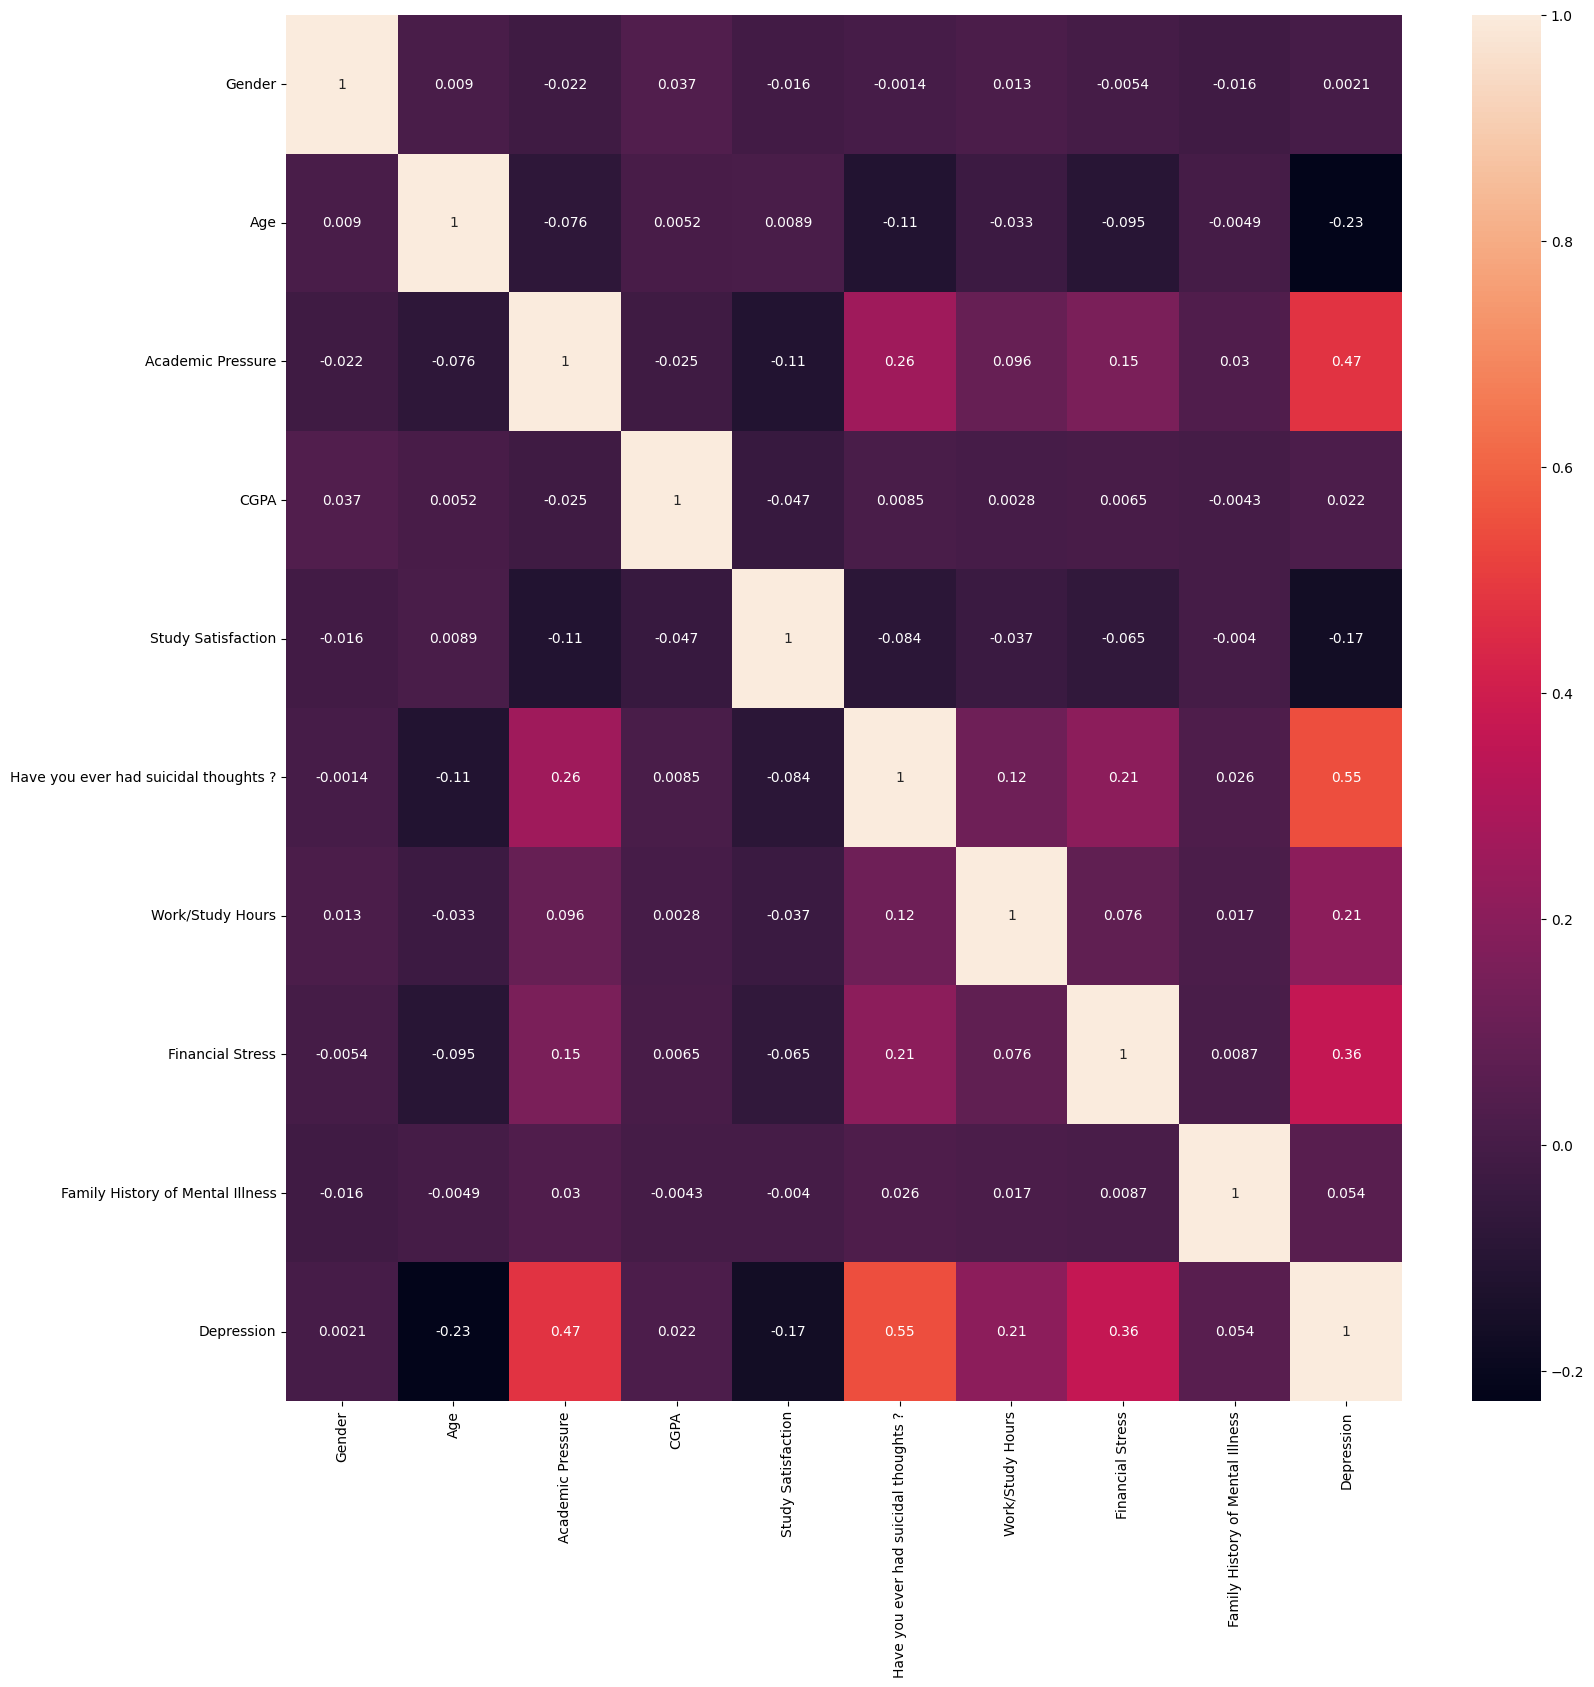

In [40]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

academic pressure, suicidal thoughts and financial stress have a high relation

In [41]:
sleep_encoder=OneHotEncoder(sparse_output=False,drop='first')
diet_encoder=OneHotEncoder(sparse_output=False,drop='first')
category_encoder=OneHotEncoder(sparse_output=False,drop='first')

In [42]:
res1=sleep_encoder.fit_transform(df[['Sleep Duration']])
res2=diet_encoder.fit_transform(df[['Dietary Habits']])
res3=category_encoder.fit_transform(df[['Category']])

In [43]:
res1=pd.DataFrame(res1,columns=sleep_encoder.get_feature_names_out())
res2=pd.DataFrame(res2,columns=diet_encoder.get_feature_names_out())
res3=pd.DataFrame(res3,columns=category_encoder.get_feature_names_out())

In [44]:
df.reset_index(drop=True,inplace=True)
df=df.join(res1).join(res2).join(res3)

In [45]:
df.drop(columns=['Sleep Duration','Category','Dietary Habits'],inplace=True)

scaling

In [46]:
x=df.drop(columns=['Depression'])
y=df['Depression']

In [47]:
x.columns

Index(['Gender', 'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Sleep Duration_7-8 hours', 'Sleep Duration_Less than 5 hours',
       'Sleep Duration_More than 8 hours', 'Sleep Duration_Others',
       'Dietary Habits_Moderate', 'Dietary Habits_Others',
       'Dietary Habits_Unhealthy', 'Category_Commerce & Management',
       'Category_Higher Secondary', 'Category_Hospitality & Architecture',
       'Category_Law & Education', 'Category_Medical & Health Sciences',
       'Category_Other', 'Category_Science & Technology'],
      dtype='object')

In [48]:
minmax=MinMaxScaler()
x_scaled=minmax.fit_transform(x)

Train Test Split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=5)

model selection

KNeighborsClassifier()
_________________________________________________
79.79181622397704
              precision    recall  f1-score   support

           0       0.77      0.72      0.75      3434
           1       0.82      0.85      0.83      4924

    accuracy                           0.80      8358
   macro avg       0.79      0.79      0.79      8358
weighted avg       0.80      0.80      0.80      8358



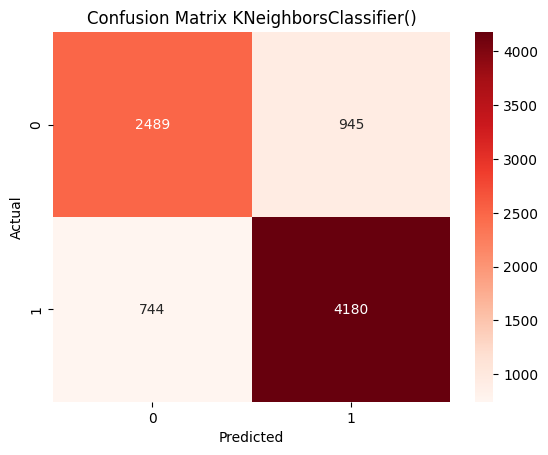

SVC()
_________________________________________________
83.96745632926537
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      3434
           1       0.85      0.88      0.87      4924

    accuracy                           0.84      8358
   macro avg       0.84      0.83      0.83      8358
weighted avg       0.84      0.84      0.84      8358



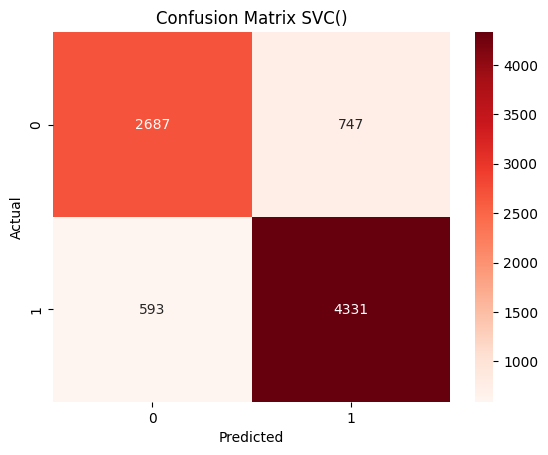

GaussianNB()
_________________________________________________
82.73510409188802
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      3434
           1       0.86      0.84      0.85      4924

    accuracy                           0.83      8358
   macro avg       0.82      0.82      0.82      8358
weighted avg       0.83      0.83      0.83      8358



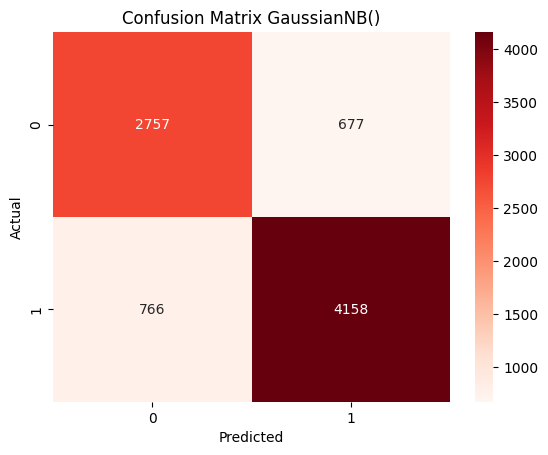

RandomForestClassifier()
_________________________________________________
83.64441253888491
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      3434
           1       0.85      0.87      0.86      4924

    accuracy                           0.84      8358
   macro avg       0.83      0.83      0.83      8358
weighted avg       0.84      0.84      0.84      8358



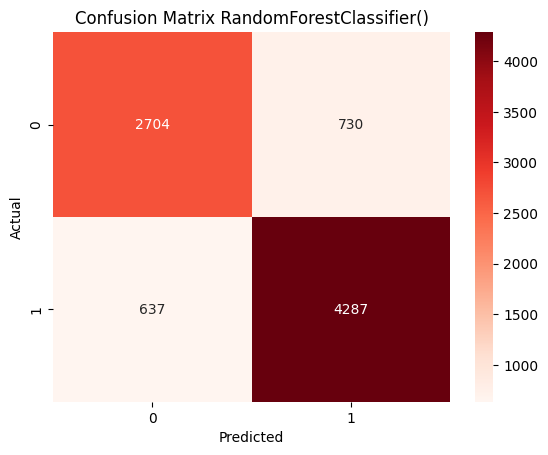

GradientBoostingClassifier()
_________________________________________________
84.0272792534099
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      3434
           1       0.86      0.88      0.87      4924

    accuracy                           0.84      8358
   macro avg       0.84      0.83      0.83      8358
weighted avg       0.84      0.84      0.84      8358



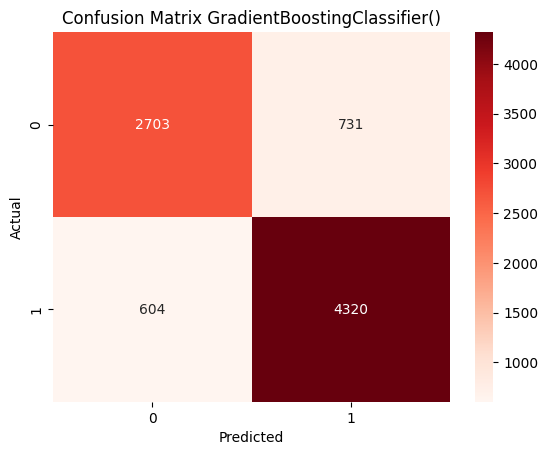

DecisionTreeClassifier()
_________________________________________________
76.5613783201723
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      3434
           1       0.80      0.80      0.80      4924

    accuracy                           0.77      8358
   macro avg       0.76      0.76      0.76      8358
weighted avg       0.77      0.77      0.77      8358



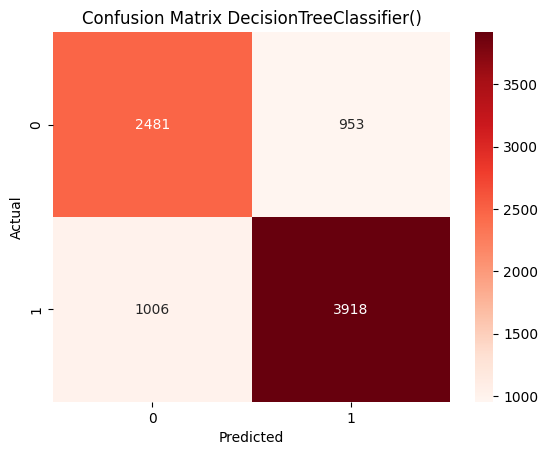

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
_________________________________________________
82.74706867671692
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      3434
           1       0.85      0.86      0.85      4924

    acc

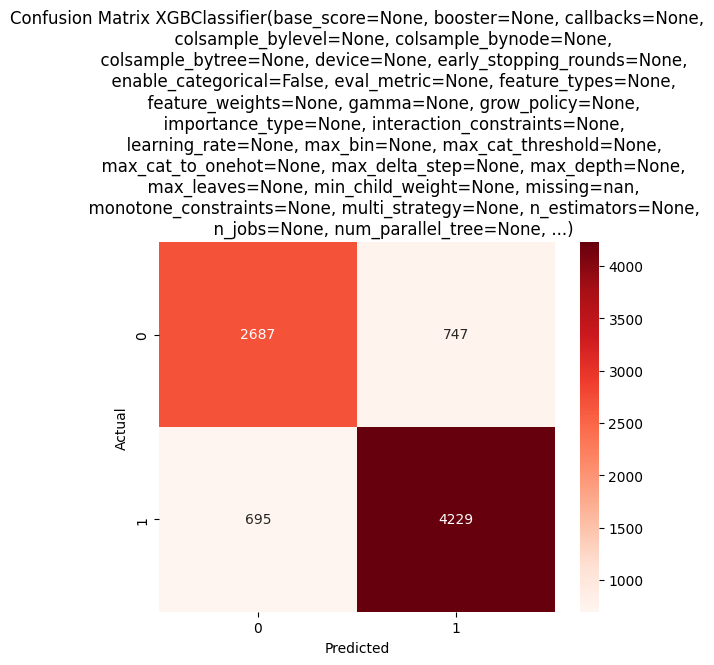

In [50]:
models=[KNeighborsClassifier(),SVC(),GaussianNB(),RandomForestClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier(),XGBClassifier()]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"{model}")
    print("_________________________________________________")
    print(accuracy_score(y_test,y_pred)*100)
    print(classification_report(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',cmap='Reds',annot=True)
    plt.title(f"Confusion Matrix {model}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [51]:
df['Depression'].value_counts()

Depression
1    16303
0    11555
Name: count, dtype: int64

KNeighborsClassifier()
_________________________________________________
79.73797559224694
              precision    recall  f1-score   support

           0       0.77      0.72      0.75      2304
           1       0.81      0.85      0.83      3268

    accuracy                           0.80      5572
   macro avg       0.79      0.79      0.79      5572
weighted avg       0.80      0.80      0.80      5572



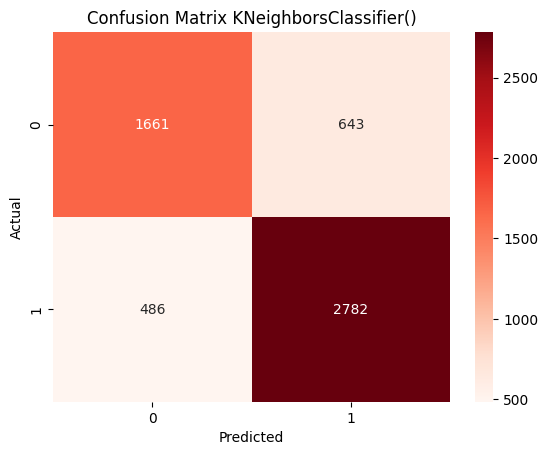

SVC()
_________________________________________________
84.51184493898062
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      2304
           1       0.85      0.89      0.87      3268

    accuracy                           0.85      5572
   macro avg       0.84      0.84      0.84      5572
weighted avg       0.84      0.85      0.84      5572



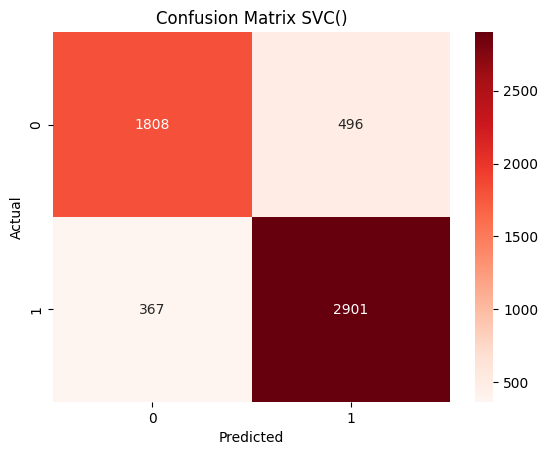

GaussianNB()
_________________________________________________
83.09404163675521
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      2304
           1       0.86      0.85      0.86      3268

    accuracy                           0.83      5572
   macro avg       0.83      0.83      0.83      5572
weighted avg       0.83      0.83      0.83      5572



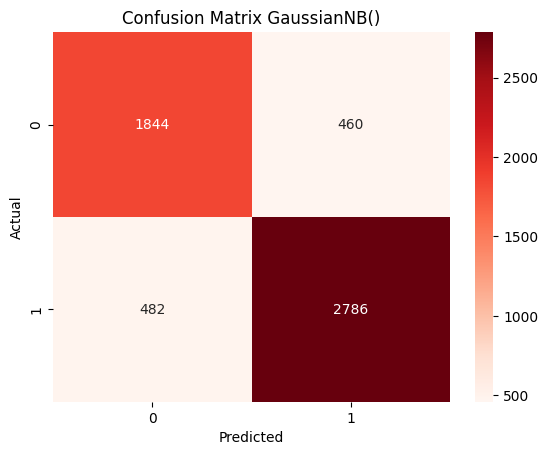

RandomForestClassifier()
_________________________________________________
84.18880114860015
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2304
           1       0.85      0.88      0.87      3268

    accuracy                           0.84      5572
   macro avg       0.84      0.83      0.84      5572
weighted avg       0.84      0.84      0.84      5572



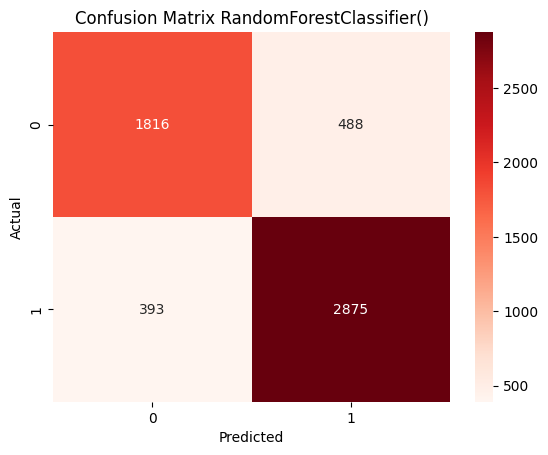

GradientBoostingClassifier()
_________________________________________________
84.45800430725053
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2304
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5572
   macro avg       0.84      0.84      0.84      5572
weighted avg       0.84      0.84      0.84      5572



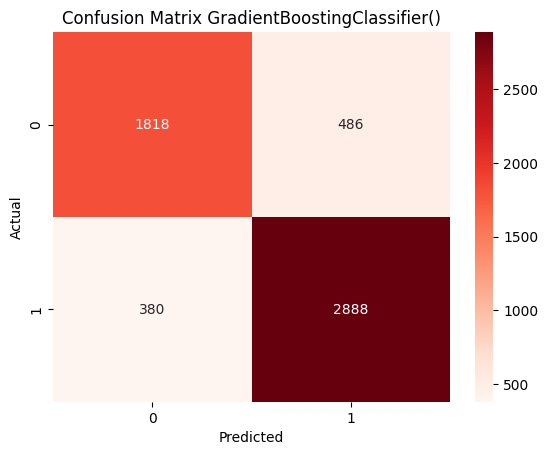

DecisionTreeClassifier()
_________________________________________________
76.65111270638909
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      2304
           1       0.80      0.80      0.80      3268

    accuracy                           0.77      5572
   macro avg       0.76      0.76      0.76      5572
weighted avg       0.77      0.77      0.77      5572



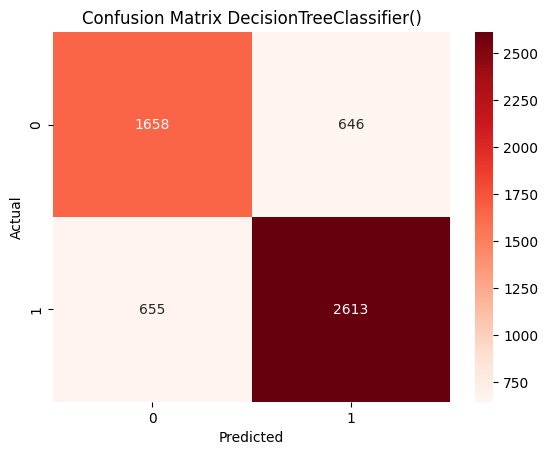

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)
_________________________________________________
83.65039483129935
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2304
           1       0.86      0.87      0.86      3268

    acc

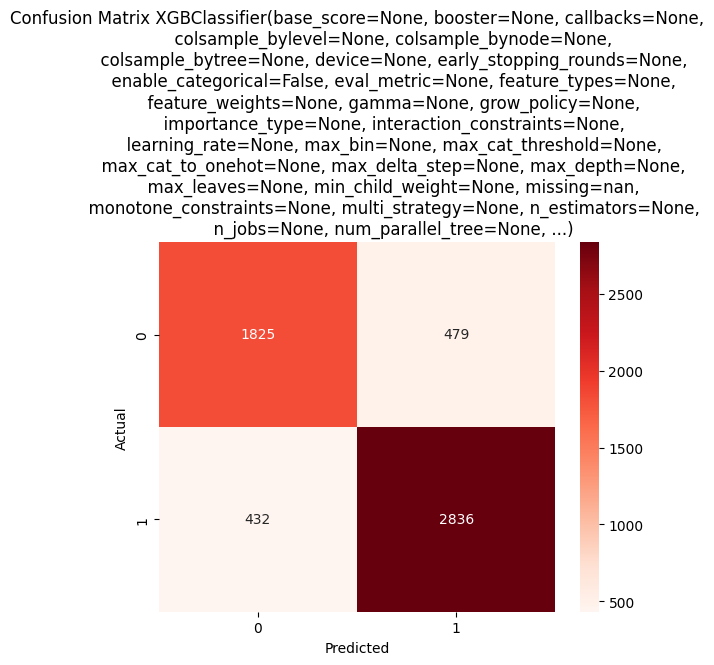

In [52]:
smote=SMOTE()
x_over,y_over=smote.fit_resample(x_scaled,y)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=5,test_size=0.2)
models=[KNeighborsClassifier(),SVC(),GaussianNB(),RandomForestClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier(),XGBClassifier()]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"{model}")
    print("_________________________________________________")
    print(accuracy_score(y_test,y_pred)*100)
    print(classification_report(y_test,y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',cmap='Reds',annot=True)
    plt.title(f"Confusion Matrix {model}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

best model by gradient 84.45

cross validation

In [53]:
cross_val_score(GradientBoostingClassifier(),x_over,y_over,cv=10).mean()

0.8643854307177407

Hyper Parameter Tuning

In [57]:
parameters={'n_estimators':[50,100,200],
            'learning_rate':[0.001,0.01,0.1],
            'max_depth':[5,7,10,15]}

In [66]:
obj1=RandomizedSearchCV(XGBClassifier(),parameters,cv=5)
obj1.fit(x_over,y_over)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           learning_rate=None, max_bin=None,
                                           max_cat_threshold=None,
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [5, 7, 10, 15],
                                        'n_estimators': [50, 100, 200]})

In [67]:
obj1.best_score_

0.8632776112050136

In [69]:
model=obj1.best_estimator_

pickling

In [70]:
dict1={'model':model,'scaler':minmax,'gender_encode':label1,'suicide_encode':label2,'family_encode':label3,'sleep':sleep_encoder,'category':category_encoder,'diet':diet_encoder}

In [71]:
with open("St_depression_main.pkl",'wb') as obj2:
  pickle.dump(dict1,obj2)